Problem Statement 
 
Write a Python program to draw (visualize) the architecture of a Neural Network used to classify fraudulent and non-fraudulent credit card transactions. 
 
Assume the fraud detection dataset contains the following input features: 
 
1. TransactionAmount 
2. TransactionTime 
3. MerchantCategory 
4. CustomerAge 
5. AccountBalance 
6. NumberOfTransactionsToday 
7. Fraud (0 = Genuine, 1 = Fraud) 

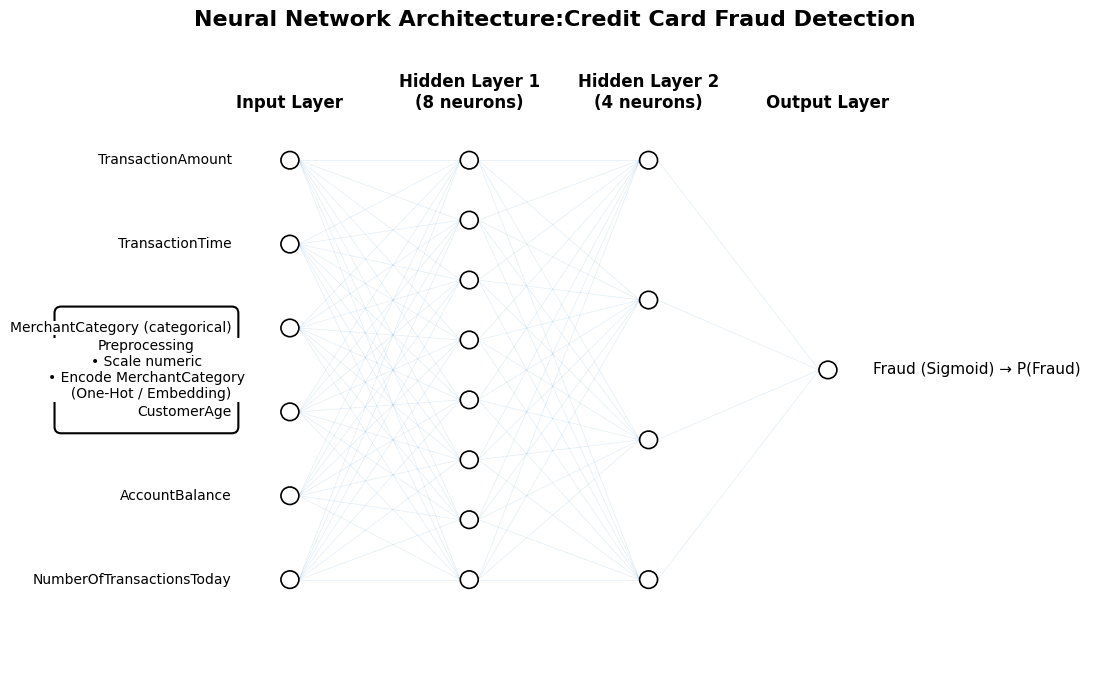

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyBboxPatch
from matplotlib.lines import Line2D

def draw_nn_architecture_no_overlap(
    input_features,
    hidden_layers=(8, 4),
    title="Neural Network Architecture:Credit Card Fraud Detection"
):
    layer_sizes= [len(input_features), *hidden_layers, 1]

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis("off")

    # More spacing fixes clutter
    x_spacing = 4.0
    x_positions = [i * x_spacing for i in range(len(layer_sizes))]

    max_neurons= max(layer_sizes)

    # More vertical spread reduces crossings density
    y_span = max(8.0, max_neurons * 1.2)

    def neuron_positions(n, center_y=0.0, y_span=8.0):
        if n == 1:
            return [center_y]
        step = y_span / (n - 1)
        top = center_y + y_span / 2
        return [top - i * step for i in range(n)]

    # --- Preprocessing box far LEFT (won't intersect anything) ---
    prep_x = x_positions[0] - 3.2
    prep_y = 0.0
    prep_box = FancyBboxPatch(
        (prep_x - 1.8, prep_y - 1.2),
        3.6, 2.4,
        boxstyle="round,pad=0.25,rounding_size=0.15",
        linewidth=1.5,
        facecolor="white",
        edgecolor="black",
        zorder=10
    )
    ax.add_patch(prep_box)
    ax.text(
        prep_x, prep_y,
        "Preprocessing\n• Scale numeric\n• Encode MerchantCategory\n  (One-Hot / Embedding)",
        ha="center", va="center", fontsize=10, zorder=11,
        bbox=dict(facecolor="white", edgecolor="none", pad=0.4)  # masks lines if any
    )

    # --- Drawing neurons ---
    all_layer_coords = []
    for layer_idx, n_neurons in enumerate(layer_sizes):
        x = x_positions[layer_idx]
        ys = neuron_positions(n_neurons, y_span=y_span)
        coords = [(x, y) for y in ys]
        all_layer_coords.append(coords)

        for (nx, ny) in coords:
            ax.add_patch(Circle((nx, ny), radius=0.20,
                                edgecolor="black", facecolor="white",
                                lw=1.2, zorder=6))

    # --- Draw connections (make them VERY light) ---
    for layer_idx in range(len(layer_sizes) - 1):
        for (x1, y1) in all_layer_coords[layer_idx]:
            for (x2, y2) in all_layer_coords[layer_idx + 1]:
                ax.add_line(Line2D(
                    [x1 + 0.20, x2 - 0.20],
                    [y1, y2],
                    lw=0.5,
                    alpha=0.12,   # << key: faint lines
                    zorder=1
                ))

    # --- Layer titles ---
    ax.text(x_positions[0], y_span/2 + 1.2, "Input Layer", ha="center",
            fontsize=12, fontweight="bold", zorder=12,
            bbox=dict(facecolor="white", edgecolor="none", pad=0.4))

    for i, h in enumerate(hidden_layers, start=1):
        ax.text(x_positions[i], y_span/2 + 1.2, f"Hidden Layer {i}\n({h} neurons)",
                ha="center", fontsize=12, fontweight="bold", zorder=12,
                bbox=dict(facecolor="white", edgecolor="none", pad=0.4))

    ax.text(x_positions[-1], y_span/2 + 1.2, "Output Layer", ha="center",
            fontsize=12, fontweight="bold", zorder=12,
            bbox=dict(facecolor="white", edgecolor="none", pad=0.4))

    # --- Input feature labels (push further left + white background)---
    label_offset =1.3
    for (x, y), feat in zip(all_layer_coords[0], input_features):
        ax.text(x - label_offset, y, feat, ha="right", va="center", fontsize=10,
                zorder=20,
                bbox=dict(facecolor="white", edgecolor="none", pad=0.25))

    # --- Output label ---
    out_x, out_y= all_layer_coords[-1][0]
    ax.text(out_x + 1.0, out_y, "Fraud (Sigmoid) → P(Fraud)",
            ha="left", va="center", fontsize=11, zorder=20,
            bbox=dict(facecolor="white", edgecolor="none", pad=0.3))

    ax.set_title(title, fontsize=16, fontweight="bold", pad=18)

    # Limits
    ax.set_xlim(prep_x - 3.0, x_positions[-1] + 6.0)
    ax.set_ylim(-y_span/2 - 2.0, y_span/2 + 2.5)
    # Showing the plot
    plt.show()


if __name__ == "__main__":
    input_features = [
        "TransactionAmount",
        "TransactionTime",
        "MerchantCategory (categorical)",
        "CustomerAge",
        "AccountBalance",
        "NumberOfTransactionsToday"
    ]
    draw_nn_architecture_no_overlap(input_features, hidden_layers=(8, 4))